In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# import os
# print(os.listdir("../input"))

In [3]:
df=pd.read_csv("C:/Users/Pooja/OneDrive/Desktop/fuel.csv")
df

,Year,Manufacturer,Model,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,1995,Chevrolet,Pickup 2500 4WD,23.543571,0,0,0,13,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
1,1995,Chevrolet,Pickup 2500 4WD,23.886563,0,0,0,14,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
2,1995,Chevrolet,S10 Pickup 4WD,19.388824,0,0,0,15,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
3,1995,Nissan,Truck 4WD,21.974000,0,0,0,14,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
4,1995,Dodge,Dakota Pickup 4WD,25.354615,0,0,0,11,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44182,1992,Mercury,Tracer,12.677308,0,0,0,22,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
44183,1992,Mercedes-Benz,300D 2.5 Turbo,15.287400,0,0,0,23,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
44184,1992,Mitsubishi,Diamante,18.311667,0,0,0,16,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0
44185,1992,Mitsubishi,Galant,15.695714,0,0,0,19,0,0,...,NaN,NaN,0,NaN,01-01-2013,01-01-2013,NaN,0,0,0


In [4]:
vehicle_df = df.loc[:,['Year', 'Manufacturer', 'Model','barrels08','fuelType','VClass']]
#vehicle_df = df.rename(index=str, columns={'barrels08': 'annual Petroleum Consumption', 'mpgData': 'MPG Data', 'VClass': 'Vehicle size'})
print(f'dataset shape (rows, columns) - {vehicle_df.shape}')
vehicle_df.head()

dataset shape (rows, columns) - (44187, 6)


,Year,Manufacturer,Model,barrels08,fuelType,VClass
0,1995,Chevrolet,Pickup 2500 4WD,23.543571,Regular,Standard Pickup Trucks
1,1995,Chevrolet,Pickup 2500 4WD,23.886563,Diesel,Standard Pickup Trucks
2,1995,Chevrolet,S10 Pickup 4WD,19.388824,Premium,Standard Pickup Trucks
3,1995,Nissan,Truck 4WD,21.974000,Regular,Standard Pickup Trucks
4,1995,Dodge,Dakota Pickup 4WD,25.354615,Regular,Standard Pickup Trucks


In [5]:
# lets check dtype of all columns, 
vehicle_df.dtypes, vehicle_df.index.dtype

(Year              int64
 Manufacturer     object
 Model            object
 barrels08       float64
 fuelType         object
 VClass           object
 dtype: object,
 dtype('int64'))

In [6]:
print(vehicle_df["Manufacturer"].value_counts())
print("No of unique MAnufacturers:",len(vehicle_df["Manufacturer"].unique()))

Chevrolet                 4219
Ford                      3540
GMC                       2635
Dodge                     2632
Toyota                    2235
                          ... 
Panoz Auto-Development       1
Aurora Cars Ltd              1
Panos                        1
Vixen Motor Company          1
E. P. Dutton, Inc.           1
Name: Manufacturer, Length: 141, dtype: int64
No of unique MAnufacturers: 141


In [7]:
print(vehicle_df["Year"].value_counts())
print("No of unique Years:",len(vehicle_df["Year"].unique()))

1984    1964
1985    1701
2018    1348
2019    1343
2017    1293
2015    1280
2016    1262
2021    1259
2020    1254
1987    1247
2014    1221
1986    1210
2008    1187
2009    1181
2013    1180
2005    1166
1989    1153
2012    1147
1991    1132
1988    1130
2007    1126
2011    1126
2004    1122
1992    1121
2010    1106
2006    1104
1993    1093
1990    1078
2003    1044
1994     982
2002     975
1995     967
2001     911
1999     852
2000     840
1998     812
1996     773
1997     762
2022     735
Name: Year, dtype: int64
No of unique Years: 39


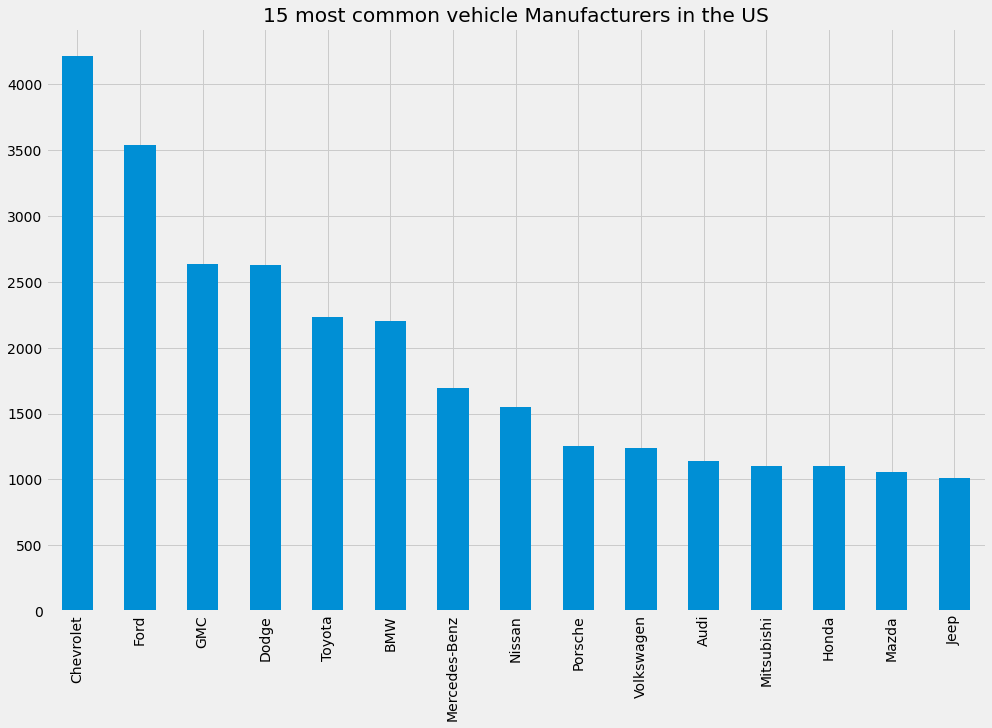

In [8]:
plt.figure(figsize=(15,10))
df['Manufacturer'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common vehicle Manufacturers in the US')
plt.show()

Text(0, 0.5, 'Percent')

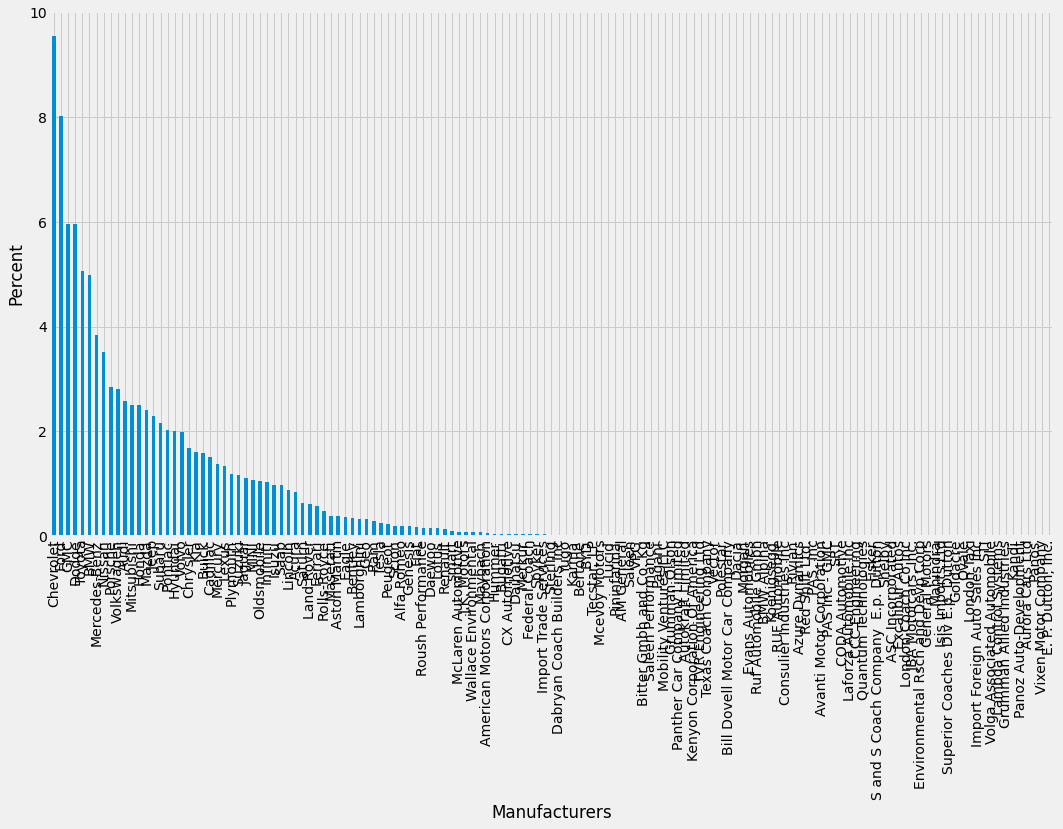

In [9]:
vehicle_production = (vehicle_df.Manufacturer.value_counts()/c.sum()))*100
vehicle_production.plot.bar(figsize=(16,9))
plt.xlabel('Manufacturers')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

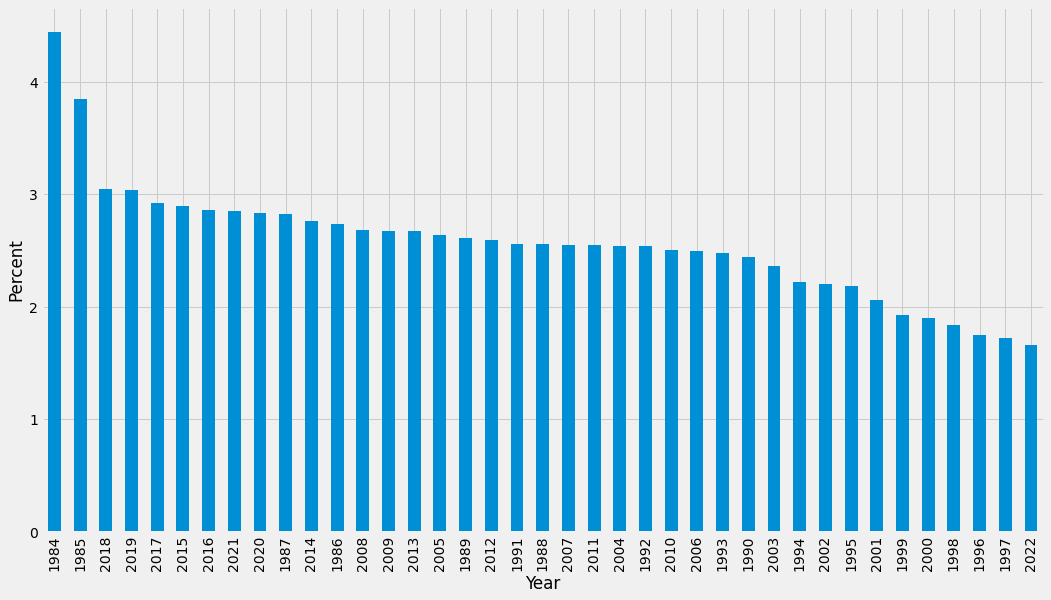

In [10]:
vehicle_productionyear = (vehicle_df.Year.value_counts()/(vehicle_df.Year.value_counts().sum()))*100
vehicle_productionyear.plot.bar(figsize=(16,9))
plt.xlabel('Year')
plt.ylabel('Percent')

In [11]:
vehicle_df = vehicle_df[vehicle_df.Year > 2010]
vehicle_df= vehicle_df[vehicle_df.Year<2021]

Text(0, 0.5, 'Percent')

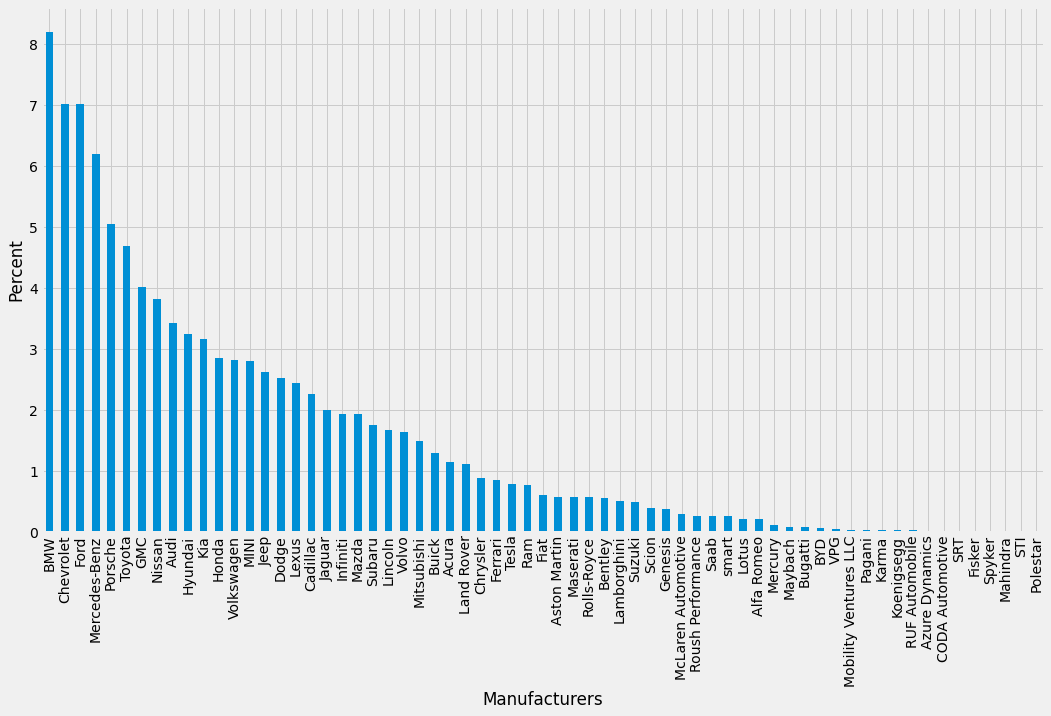

In [12]:
vehicle_production = (vehicle_df.Manufacturer.value_counts()/(vehicle_df.Manufacturer.value_counts().sum()))*100
vehicle_production.plot.bar(figsize=(16,9))
plt.xlabel('Manufacturers')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

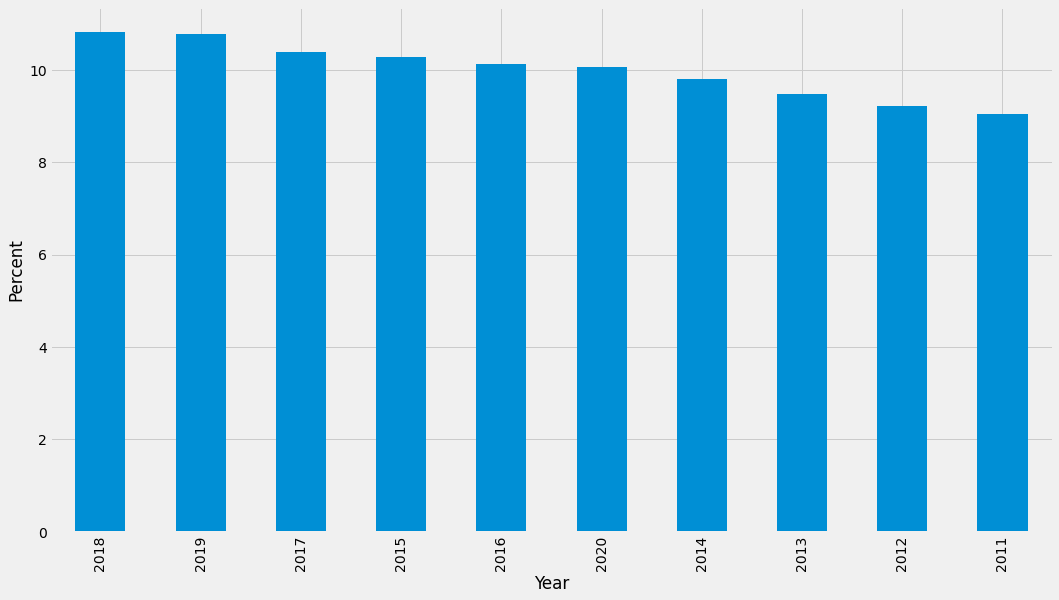

In [13]:
vehicle_productionyear = (vehicle_df.Year.value_counts()/(vehicle_df.Year.value_counts().sum()))*100
vehicle_productionyear.plot.bar(figsize=(16,9))
plt.xlabel('Year')
plt.ylabel('Percent')

C:\Users\Pooja\anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


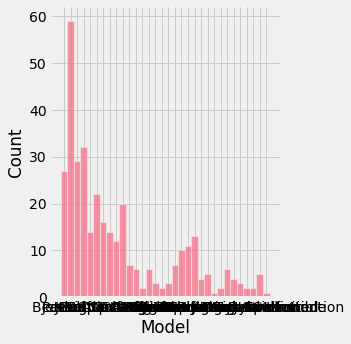

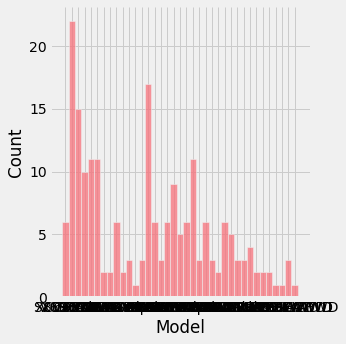

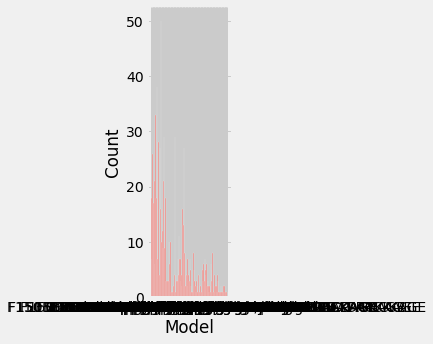

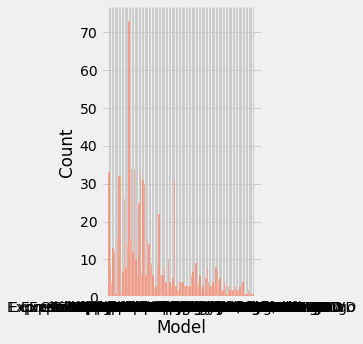

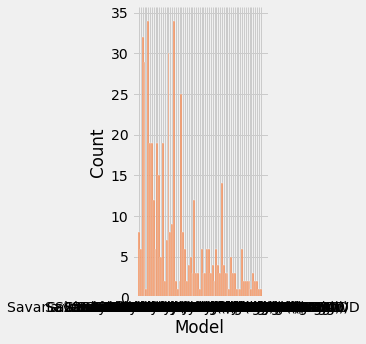

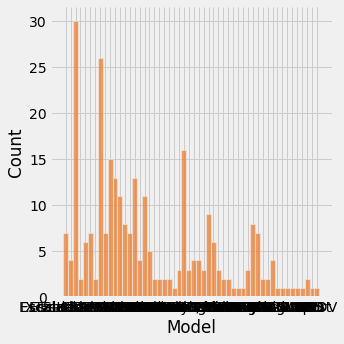

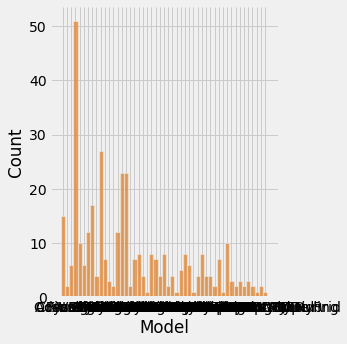

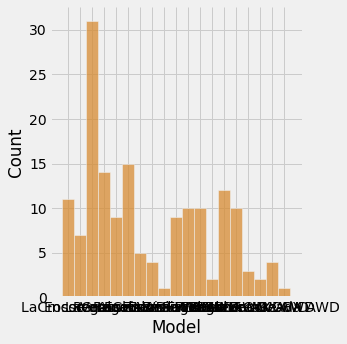

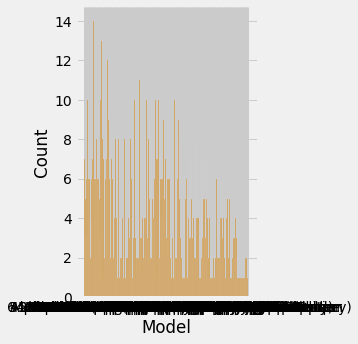

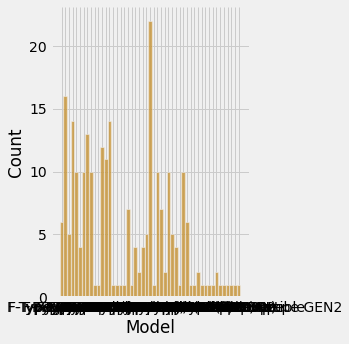

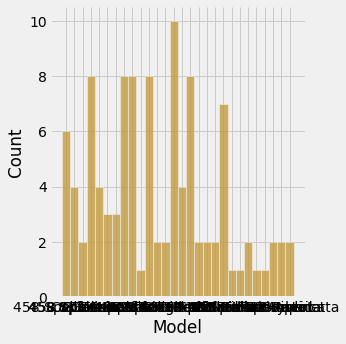

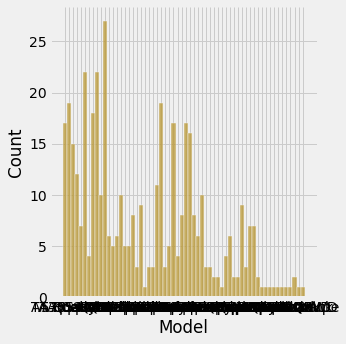

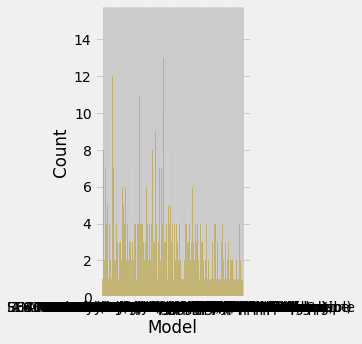

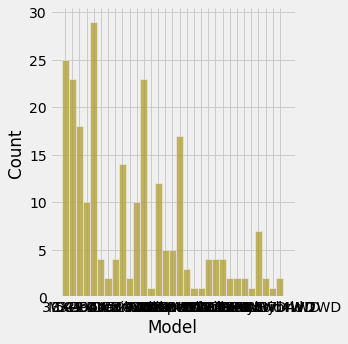

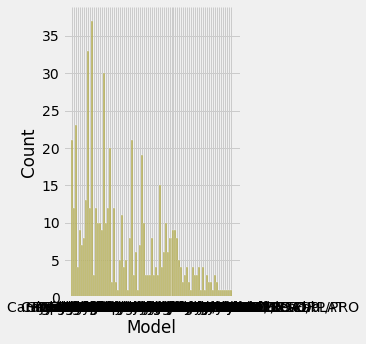

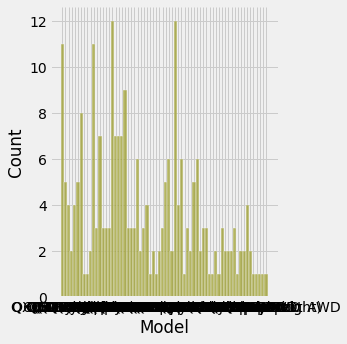

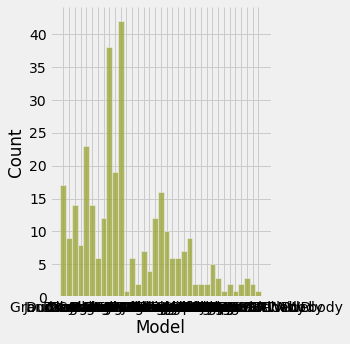

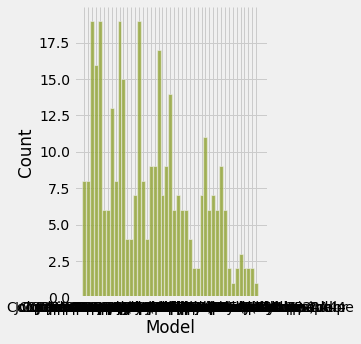

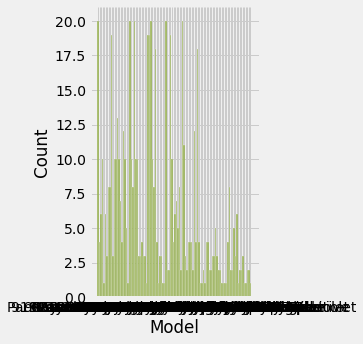

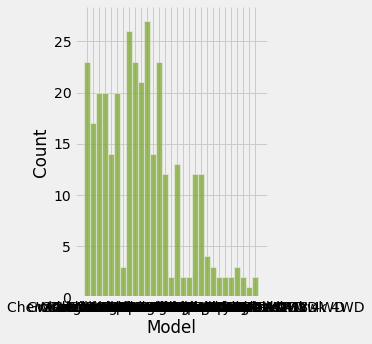

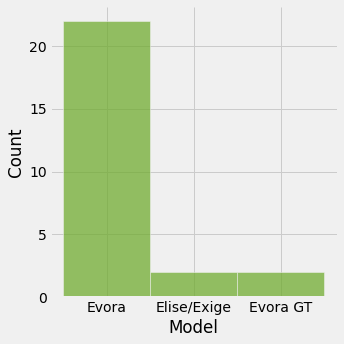

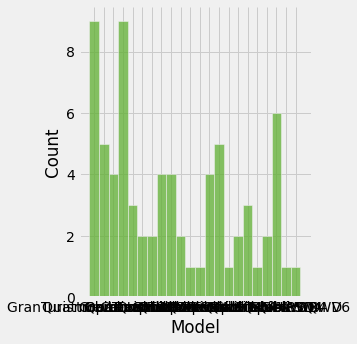

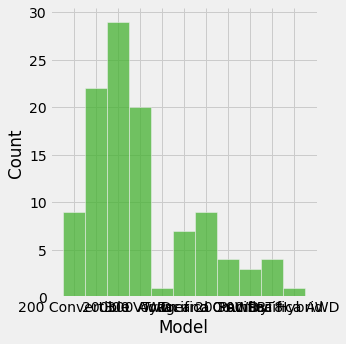

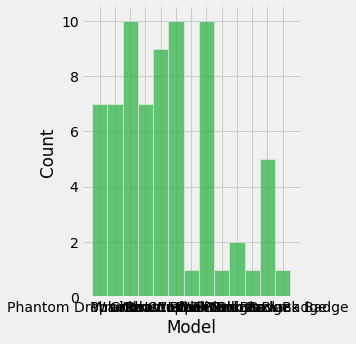

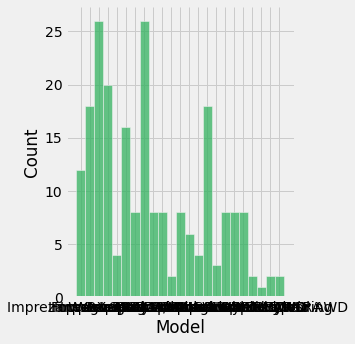

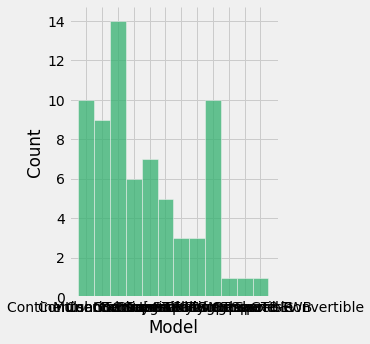

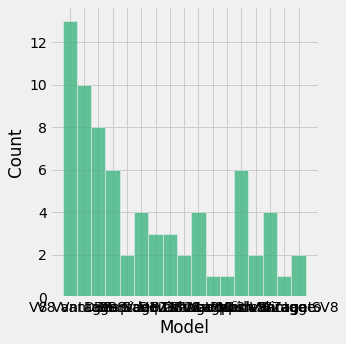

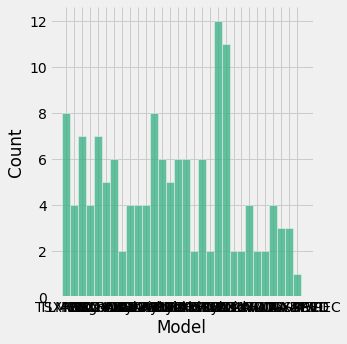

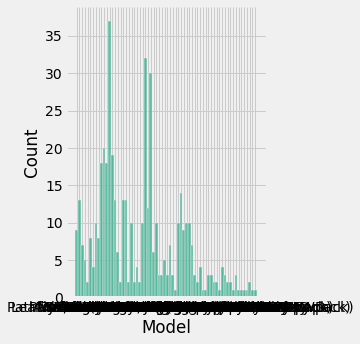

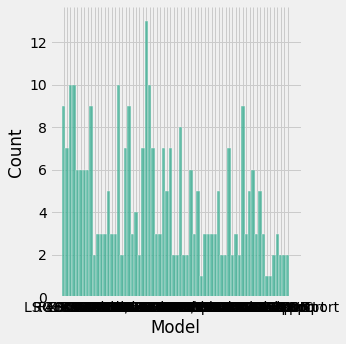

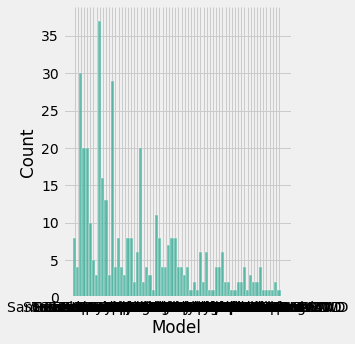

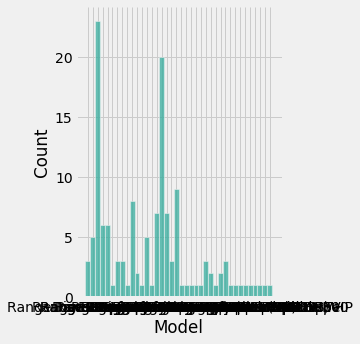

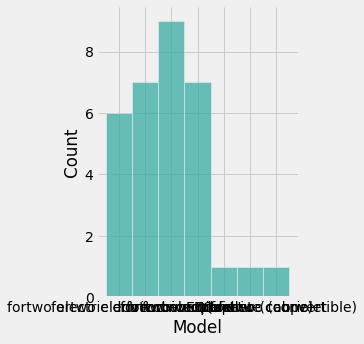

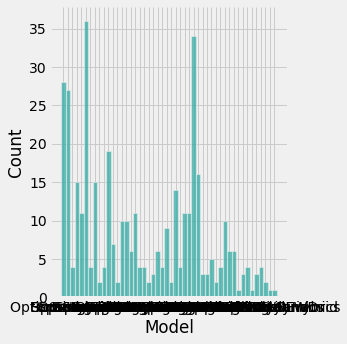

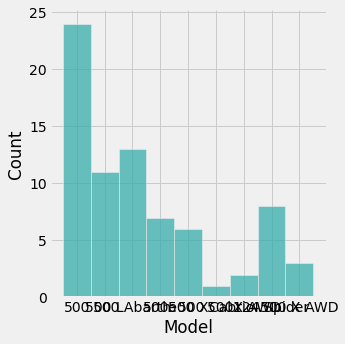

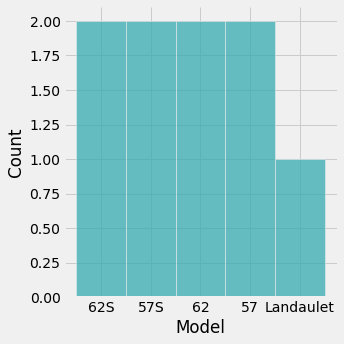

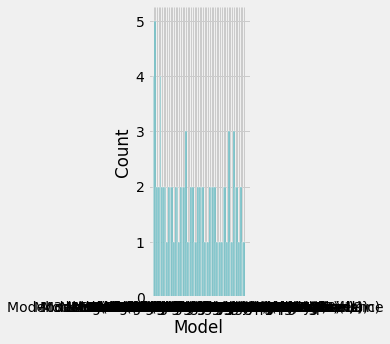

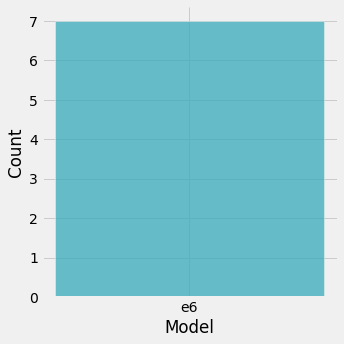

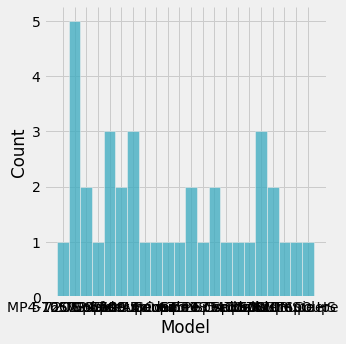

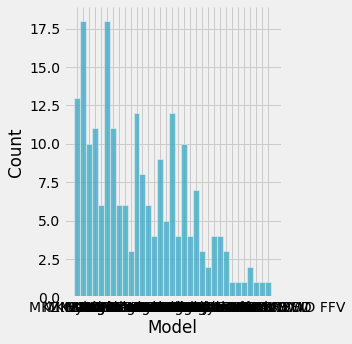

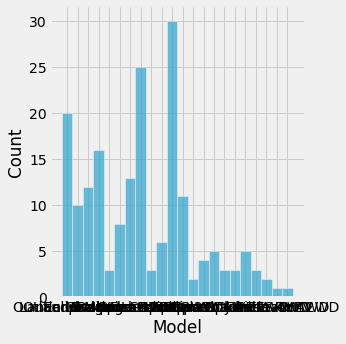

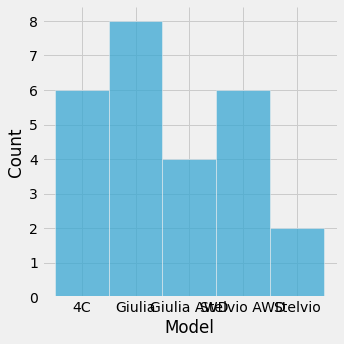

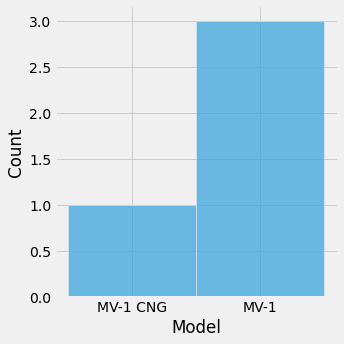

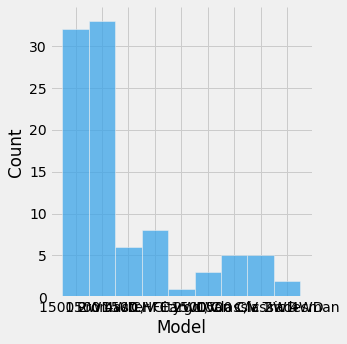

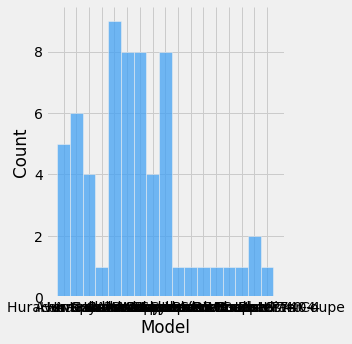

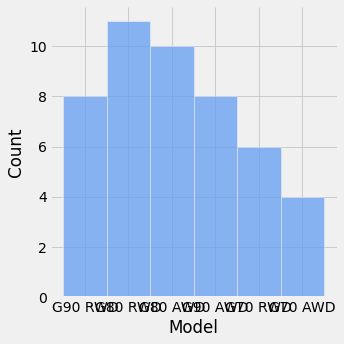

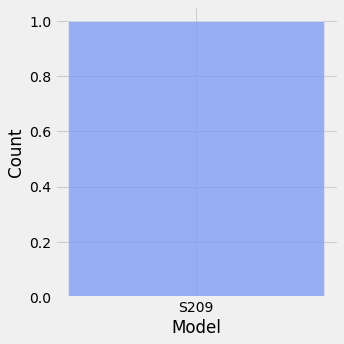

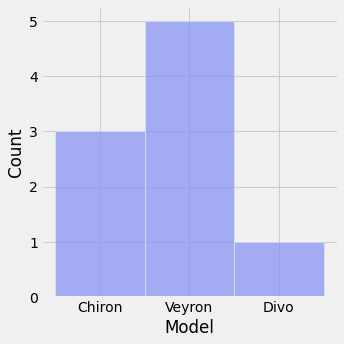

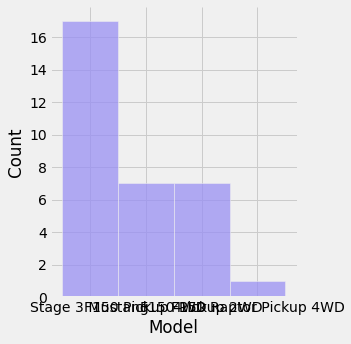

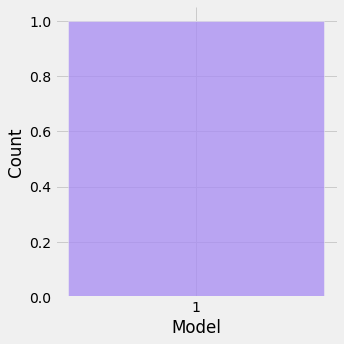

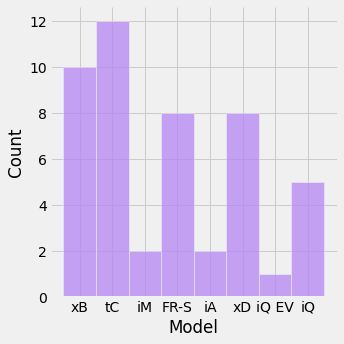

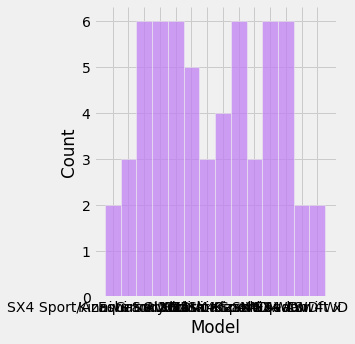

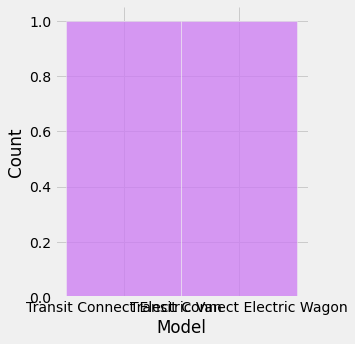

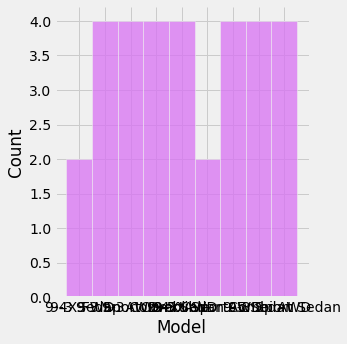

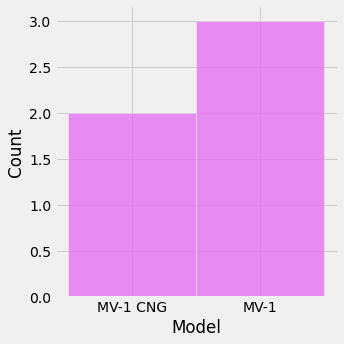

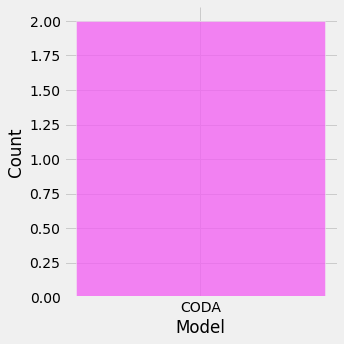

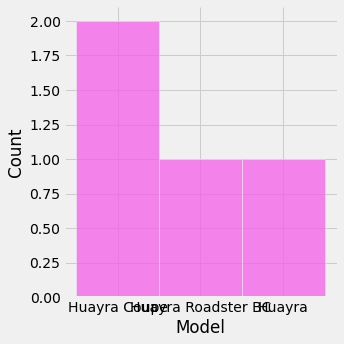

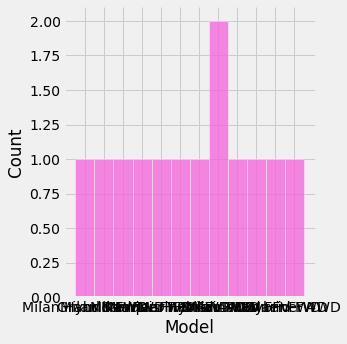

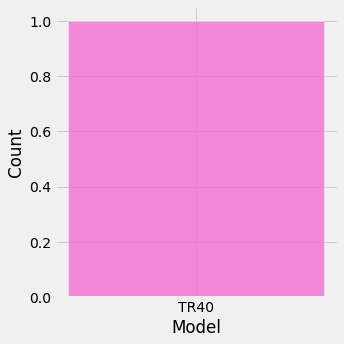

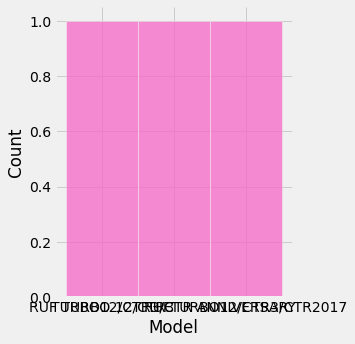

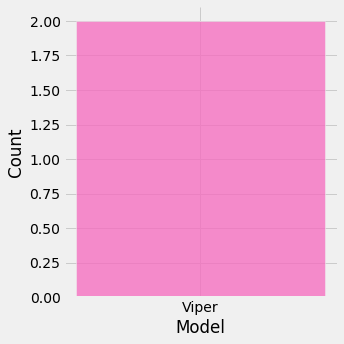

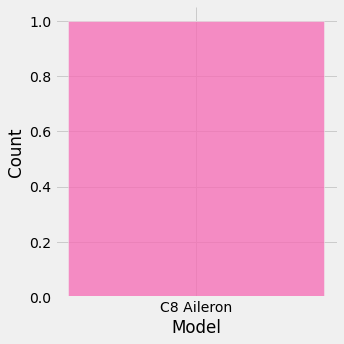

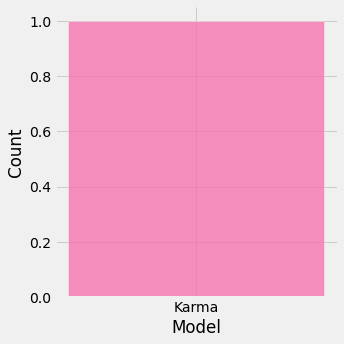

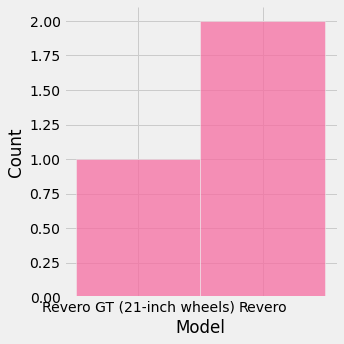

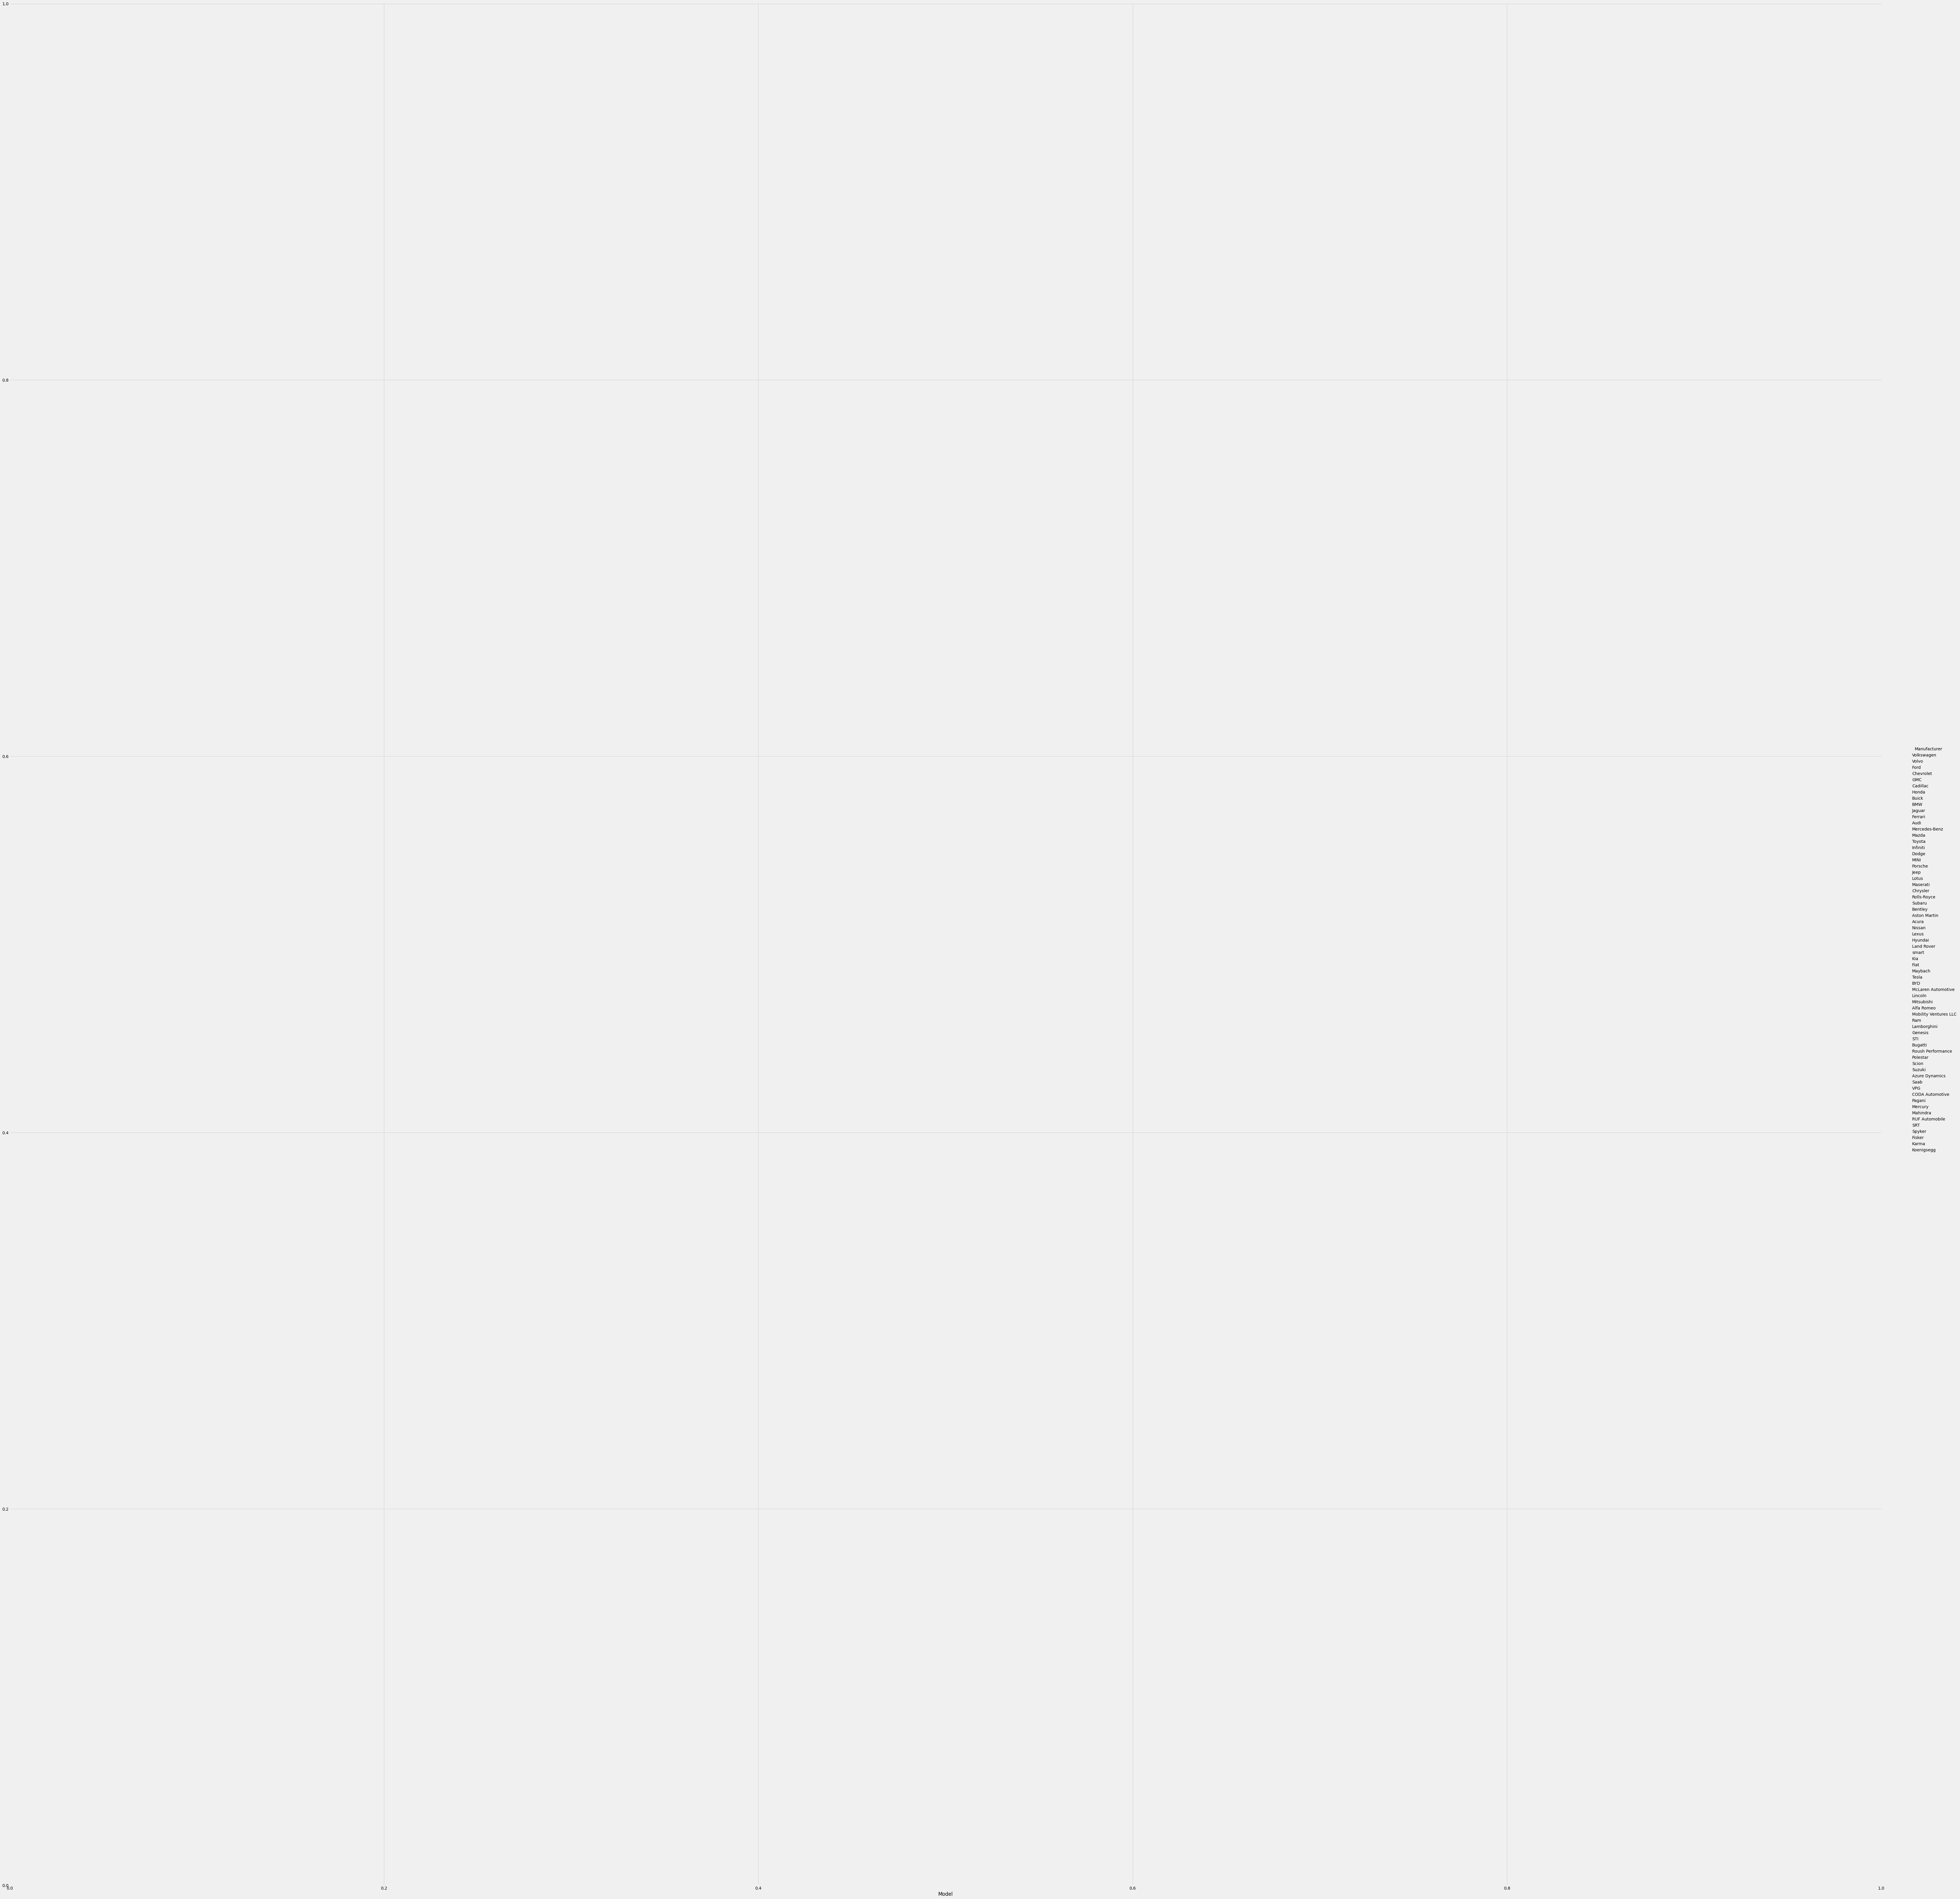

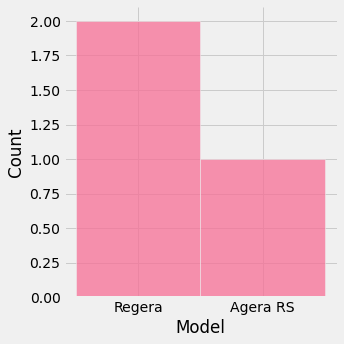

In [19]:
sns.FacetGrid(vehicle_df,hue='Manufacturer',height=90).map(sns.displot,'Model').add_legend()

In [22]:
plt.pie(vehicle_df.Model, labels = ,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Models')
#Show the plot
plt.show()

NameError: name 'Model' is not defined

ValueError: 'label' must be of length 'x'

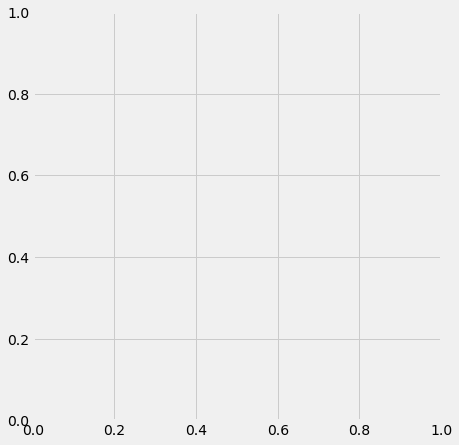

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
cars = vehicle_df.Model

data = vehicle_df.Model.value_counts()

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = cars,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, cars,
		title ="Cars",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()


ValueError: could not convert string to float: 'Chevrolet'

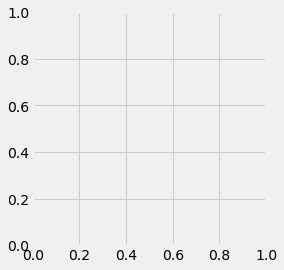

In [25]:
from pandas import DataFrame
import matplotlib.pyplot as plt

vehicl1e_df = DataFrame(vehicle_df,columns=['Model'])

my_labels = 'Tasks Pending','Tasks Ongoing','Tasks Completed'
plt.pie(df,labels=my_labels,autopct='%1.1f%%')
plt.title('My Tasks')
plt.axis('equal')
plt.show()